<a href="https://colab.research.google.com/github/adara31/Situaci-n-problema/blob/main/Image_deconvolution_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Deconvolution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.fftpack import fftn, ifftn, fftshift
from PIL import Image

Abrir imagen y convertirla a escala de grises

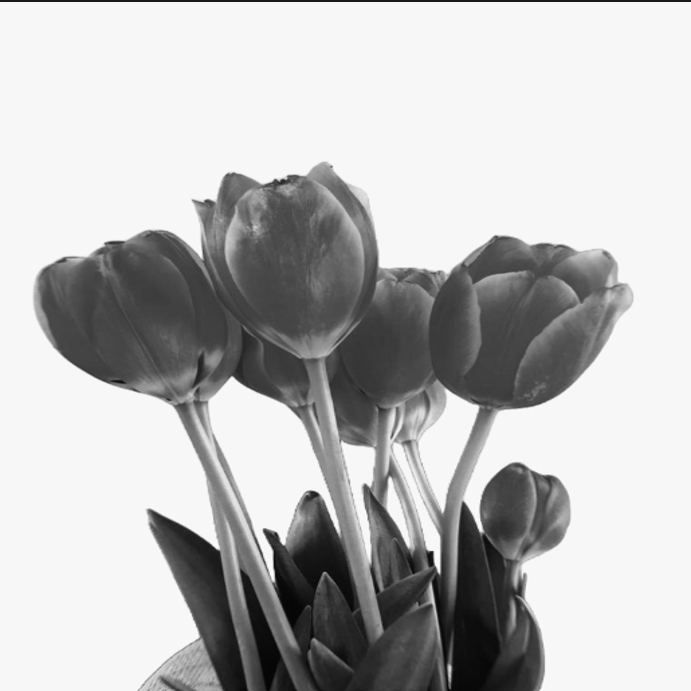

In [ ]:
im = Image.open(r"flores.png")
im = im.convert('L')
box_size = max([im.height -1 ,im.width])
im_resize = im.resize((box_size,box_size))
im_resize




Crear filtro Gaussiano

In [ ]:
def gaussian_filter(k=5, sigma=1.0):
    arx = np.arange((-k // 2) + 1.0, (k // 2) + 1.0)
    x, y = np.meshgrid(arx, arx)
    filt = np.exp(-(1/2) * (np.square(x) + np.square(y)) / np.square(sigma))
    return filt / np.sum(filt)

Ajuste de Tamaño

In [ ]:
f = im_resize
h = gaussian_filter(k=27, sigma=110)
a = int(f.size[0]//2 - h.shape[0]//2)
h_pad = np.pad(h, (a,a), 'constant', constant_values=(0))


Transformadas rápdidas de fourier

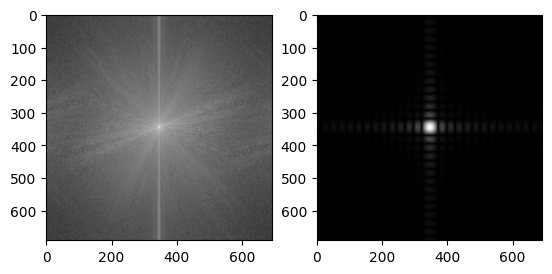

In [ ]:
F = fftn(f)
H = fftn(h_pad)
plt.subplot(121)
plt.imshow(fftshift(np.log(np.abs(F)+1)), cmap="gray")
plt.subplot(122)
plt.imshow(fftshift(np.log(np.abs(H)+1)), cmap="gray")


Convulción

In [ ]:
G = np.multiply(F,H)


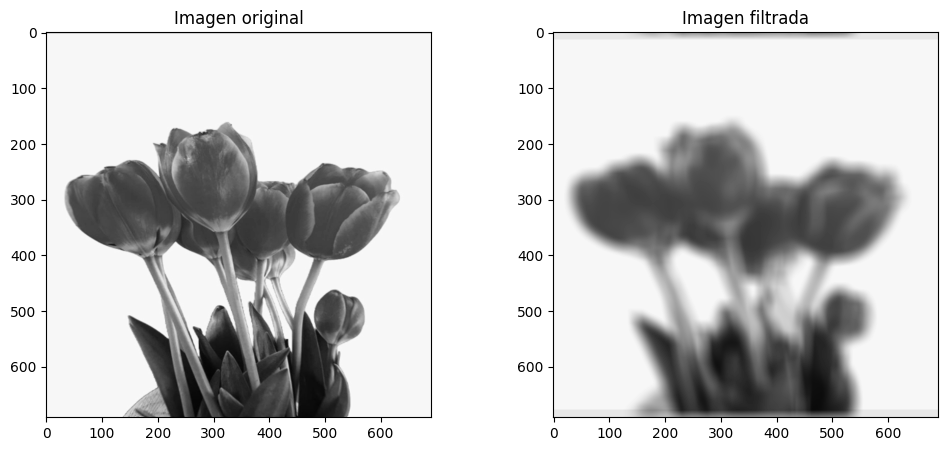

In [ ]:
g = fftshift(ifftn(G).real)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(f, cmap="gray", vmin=0, vmax=255); plt.title("Imagen original")
plt.subplot(122)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("Imagen filtrada")

piwa = g.astype(np.uint8)
piwa = Image.fromarray(piwa)
piwa.save('flores_filtro.png')


Invertir el proceso de convolución

Text(0.5, 1.0, 'Imagen restaurada')

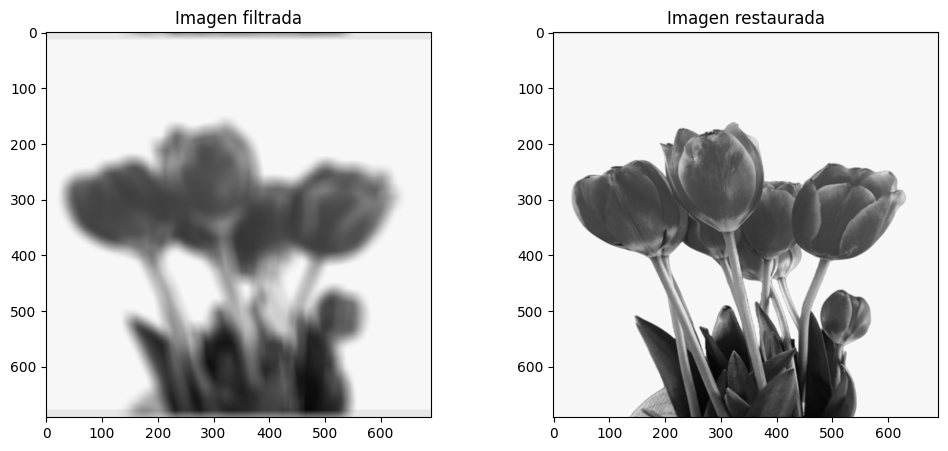

In [ ]:
F_hat = np.divide(G,H)

f_hat = ifftn(F_hat).real

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("Imagen filtrada")
plt.subplot(122)
plt.imshow(f_hat, cmap="gray", vmin=0, vmax=255); plt.title("Imagen restaurada")

TypeError: ignored